<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی اصفهان - دانشکده علوم ریاضی
            </font>
			<p></p>
			<font color=blue>
الگوریتم‌های علوم داده
            </font>
			<br />
			<br />
بهار ۱۴۰۳
		</div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>
مینی‌پروژه‌ی ۳ (SVM with kernel, Multi-class SVM, Decision tree)
            </div>
		</font>
		<br />
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
		<div>
			<h3>فهرست مطالب</h3>
			<ul style="margin-right: 0;">
                <li>
					<a href="#SVMK">
                        SVM with kernel
                    </a>
				</li>
                <li>
					<a href="#MSVM">
                       Multi-class SVM
                    </a>
				</li>
                <li>
					<a href="#tree">
                        Decision tree
                    </a>
				</li>
			</ul>
		</div>
	</font>
</div>

<div align="center">
    <a href="#The Model-Selection Curve">
        <font face="B Nazanin" size="15">
            <font color="#FF7500" size="15">
                SVM with kernel
            </font>
            <br>
            <hr>
        </font>
    </div>
</div>


# Plot classification boundaries with different SVM Kernels

This example shows how different kernels in a SVC (Support Vector Classifier) influence the classification boundaries in a binary, two-dimensional classification problem.

In this example, we compare the most common kernel types of Support Vector Machines: the linear kernel ("linear"), the polynomial kernel ("poly"), the radial basis function kernel ("rbf") and the sigmoid kernel ("sigmoid").

## Creating a dataset

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
cd /content/drive/MyDrive/mini_por

/content/drive/MyDrive/mini_por


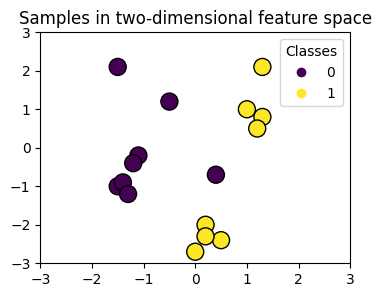

In [82]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array(
    [
        [0.4, -0.7],
        [-1.5, -1.0],
        [-1.4, -0.9],
        [-1.3, -1.2],
        [-1.1, -0.2],
        [-1.2, -0.4],
        [-0.5, 1.2],
        [-1.5, 2.1],
        [1.0, 1.0],
        [1.3, 0.8],
        [1.2, 0.5],
        [0.2, -2.0],
        [0.5, -2.4],
        [0.2, -2.3],
        [0.0, -2.7],
        [1.3, 2.1],
    ]
)

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Plotting settings
fig, ax = plt.subplots(figsize=(4, 3))
x_min, x_max, y_min, y_max = -3, 3, -3, 3
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

We can see that the samples are not clearly separable by a straight line.

## Training SVC model and plotting decision boundaries

Complete the following function that fits a SVC classifier, allowing the `kernel` parameter as an input, and then plots the decision boundaries learned by the model using DecisionBoundaryDisplay.

Notice that for the sake of simplicity, the `C` parameter is set to its default value (`C=1`) in this example and the `gamma` parameter is set to `gamma=2` across all kernels, although it is automatically ignored for the linear kernel. In a real classification task, where performance matters, parameter tuning (by using GridSearchCV for instance) is highly recommended to capture different structures within the data.

Setting `response_method="predict"` in DecisionBoundaryDisplay colors the areas based on their predicted class. Using `response_method="decision_function"` allows us to also plot the decision boundary and the margins to both sides of it. Finally the support vectors used during training (which always lay on the margins) are identified by means of the `support_vectors_` attribute of the trained SVCs, and plotted as well.

In [83]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plotTrainingDataWithDecisionBoundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC on features X and labels y using the given kernel and gamma = 2
    # ***************************************************
    # COMPLETE THE CODE BELOW
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)
    # ***************************************************

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

## Linear kernel
Linear kernel is the dot product of the input samples:
$$
K(\mathbf{x}_1, \mathbf{x}_2) = \mathbf{x}_1^\top \mathbf{x}_2
$$
It is then applied to any combination of two data points (samples) in the dataset. The dot product of the two points determines the cosine_similarity between both points. The higher the value, the more similar the points are.

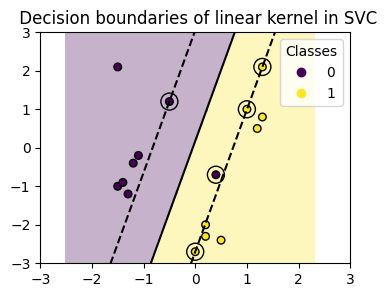

In [84]:
# plot the classification using linear kernel
# ***************************************************
plotTrainingDataWithDecisionBoundary("linear")
# ***************************************************

Training a SVC on a linear kernel results in an untransformed feature space, where the hyperplane and the margins are straight lines. Due to the lack of expressivity of the linear kernel, the trained classes do not perfectly capture the training data.

## Polynomial kernel
The polynomial kernel changes the notion of similarity. The kernel function is defined as:
$$
K(\mathbf{x}_1, \mathbf{x}_2) = (\gamma \cdot \
    \mathbf{x}_1^\top\mathbf{x}_2 + r)^d
$$
where $d$
is the degree (`degree`) of the polynomial, $\gamma$
(`gamma`) controls the influence of each individual training sample on the decision boundary and $r$
is the bias term (`coef0`) that shifts the data up or down. Here, we use the default value for the degree of the polynomial in the kernel function (`degree=3`). When `coef0=0` (the default), the data is only transformed, but no additional dimension is added. Using a polynomial kernel is equivalent to creating PolynomialFeatures and then fitting a SVC with a linear kernel on the transformed data, although this alternative approach would be computationally expensive for most datasets.

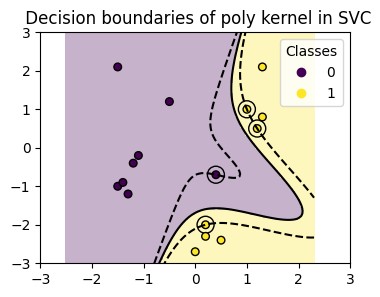

In [85]:
# plot the classification using polynomial kernel
# ***************************************************
plotTrainingDataWithDecisionBoundary("poly")
# ***************************************************

The polynomial kernel with `gamma=2` adapts well to the training data, causing the margins on both sides of the hyperplane to bend accordingly.

## RBF kernel

The radial basis function (RBF) kernel, also known as the Gaussian kernel, is the default kernel for Support Vector Machines in scikit-learn. It measures similarity between two data points in infinite dimensions and then approaches classification by majority vote. The kernel function is defined as:
$$
K(\mathbf{x}_1, \mathbf{x}_2) = \exp\left(-\gamma \cdot
    {\|\mathbf{x}_1 - \mathbf{x}_2\|^2}\right)
$$
where $\gamma$
(gamma) controls the influence of each individual training sample on the decision boundary.

The larger the euclidean distance between two points
the closer the kernel function is to zero. This means that two points far away are more likely to be dissimilar.

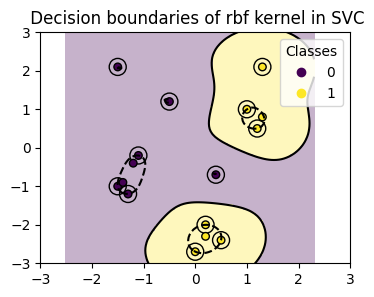

In [86]:
# plot the classification using rbf kernel
# ***************************************************
plotTrainingDataWithDecisionBoundary("rbf")
# ***************************************************

In the plot we can see how the decision boundaries tend to contract around data points that are close to each other.

## Sigmoid kernel

The sigmoid kernel function is defined as:
$$
K(\mathbf{x}_1, \mathbf{x}_2) = \tanh(\gamma \cdot
    \mathbf{x}_1^\top\mathbf{x}_2 + r)
$$
where the kernel coefficient $\gamma$
(`gamma`) controls the influence of each individual training sample on the decision boundary and $r$

is the bias term (`coef0`) that shifts the data up or down.

In the sigmoid kernel, the similarity between two data points is computed using the hyperbolic tangent function ($\tanh$). The kernel function scales and possibly shifts the dot product of the two points ($x_1$ and $x_2$
and
).

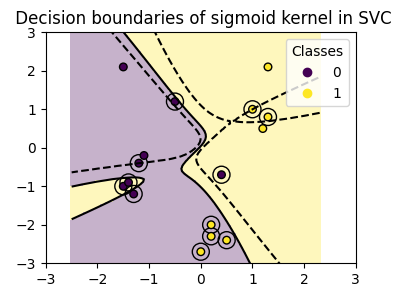

In [87]:
# plot the classification using sigmoid kernel
# ***************************************************
plotTrainingDataWithDecisionBoundary("sigmoid")
# ***************************************************

We can see that the decision boundaries obtained with the sigmoid kernel appear curved and irregular. The decision boundary tries to separate the classes by fitting a sigmoid-shaped curve, resulting in a complex boundary that may not generalize well to unseen data. From this example it becomes obvious, that the sigmoid kernel has very specific use cases, when dealing with data that exhibits a sigmoidal shape. In this example, careful fine tuning might find more generalizable decision boundaries. Because of it’s specificity, the sigmoid kernel is less commonly used in practice compared to other kernels.

## Conclusion
In this example, we have visualized the decision boundaries trained with the provided dataset. The plots serve as an intuitive demonstration of how different kernels utilize the training data to determine the classification boundaries.

The hyperplanes and margins, although computed indirectly, can be imagined as planes in the transformed feature space. However, in the plots, they are represented relative to the original feature space, resulting in curved decision boundaries for the polynomial, RBF, and sigmoid kernels.

Please note that the plots do not evaluate the individual kernel’s accuracy or quality. They are intended to provide a visual understanding of how the different kernels use the training data.

For a comprehensive evaluation, fine-tuning of SVC parameters using techniques such as GridSearchCV is recommended to capture the underlying structures within the data.

## XOR dataset
A classical example of a dataset which is not linearly separable is the XOR pattern. Here we demonstrate how different kernels work on such a dataset.

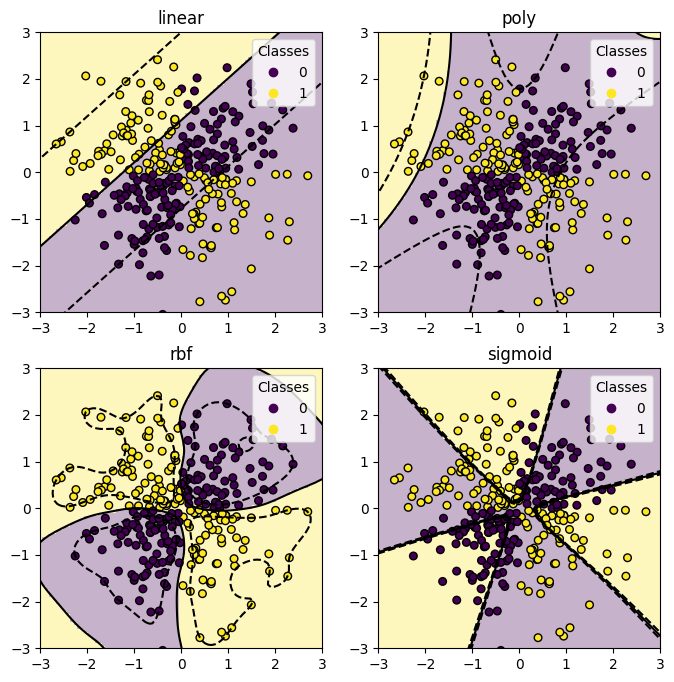

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Generate mesh grid
# (hint: use np.meshgrid to create a grid of points in the range -3 to 3 with 500 points)
# ***************************************************
# COMPLETE THE CODE BELOW
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
# ***************************************************

# Generate random data
np.random.seed(0)
# (hint: use np.random.randn to generate 300 random samples with 2 features)
# ***************************************************
# COMPLETE THE CODE BELOW
X = np.random.randn(300, 2)
# ***************************************************

# Generate labels using XOR logic
# (hint: use np.logical_xor to xor first column of X with its second column. values greater than zero
# are considered True(1) and values less than zero are considered False(0))
# ***************************************************
# COMPLETE THE CODE BELOW
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
# ***************************************************

# Create subplots
_, ax = plt.subplots(2, 2, figsize=(8, 8))

# Define arguments for plotting
args = dict(long_title=False, support_vectors=False)

# Plot decision boundaries for different kernels
plotTrainingDataWithDecisionBoundary("linear", ax[0, 0], **args)

plotTrainingDataWithDecisionBoundary("poly", ax[0, 1], **args)

plotTrainingDataWithDecisionBoundary("rbf", ax[1, 0], **args)

plotTrainingDataWithDecisionBoundary("sigmoid", ax[1, 1], **args)

# Show the plot
plt.show()


As you can see from the plots above, only the `rbf` kernel can find a reasonable decision boundary for the above dataset.

<div align="center">
    <a href="#MSVM">
        <font face="B Nazanin" size="15">
            <font color="#FF7500" size="15">
                Multi-class SVM
            </font>
            <br>
            <hr>
        </font>
    </div>
</div>

In [89]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions


In [90]:
# Load the Iris dataset, only take the first two features of data for visualization purposes
# ***************************************************
# COMPLETE THE CODE BELOW
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
# ***************************************************

In [91]:
# Split the data into 70 percent training and 30 percent testing sets and random_state 42
# ***************************************************
# COMPLETE THE CODE BELOW
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ***************************************************

In [92]:
# Standardize the features
# (hint: initialize standard scaler and then using fit_transform and transform functions
# to scale the train set and test set respectively)
# ***************************************************
# COMPLETE THE CODE BELOW
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# ***************************************************

In [93]:
# Using SVC, create and train the SVM model using rbf kernel and ovr decision_function_shape
# ***************************************************
# COMPLETE THE CODE BELOW
model = SVC(kernel='rbf', random_state=42)
# Also fit the model training set
model.fit(X_train, y_train)
# ***************************************************

SVC(random_state=42)

In [94]:
# Predict the test set
# ***************************************************
# COMPLETE THE CODE BELOW
y_pred = model.predict(X_test)
# ***************************************************

In [95]:
# Evaluate the model
# ***************************************************
# COMPLETE THE CODE BELOW
# print confusion matrix with respect to y_test and y_pred
print("Confusion Matrix:")
print(...)
# ***************************************************
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
Ellipsis

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30



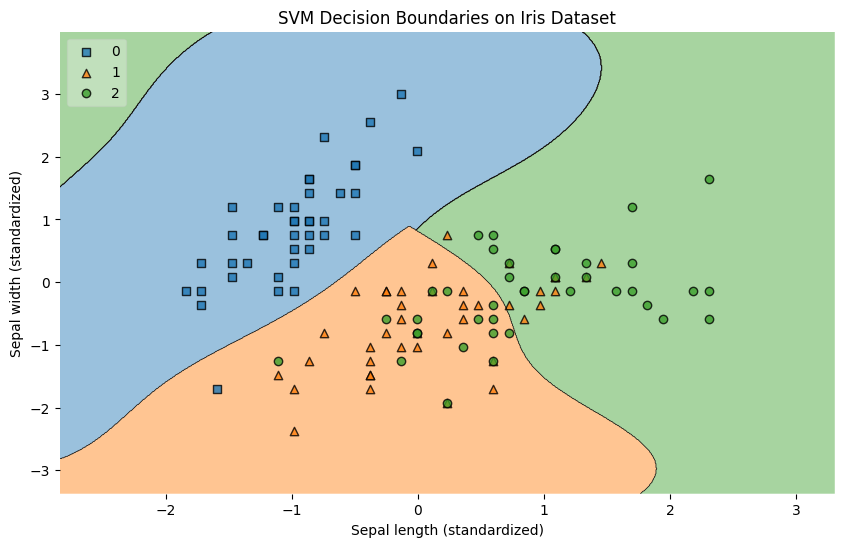

In [96]:
# Visualize the decision boundaries
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, clf=model, legend=2)
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('SVM Decision Boundaries on Iris Dataset')
plt.show()

<div align="center">
    <a href="#tree">
        <font face="B Nazanin" size="15">
            <font color="#FF7500" size="15">
                Decision tree
            </font>
            <br>
            <hr>
        </font>
    </div>
</div>

# Decision Tree Classifier
## Importing Required Libraries
Let's first load the required libraries.

In [97]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Loading Data
Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function.

In [98]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load the diabetes.csv dataset
### ___ Enter your code here ___ ###
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)
####################################

In [99]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [100]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
### ___ Enter your code here ___ ###
X = pima[feature_cols] # Features
y = pima.label # Target variable
####################################

## Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function `train_test_split()`. You need to pass three parameters features; target, and test_set size.

In [101]:
# Split dataset into training set and test set
### ___ Enter your code here ___ ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test and random_state = 1
####################################

## Building Decision Tree Model

Let's create a decision tree model using Scikit-learn.

In [102]:
# Create Decision Tree classifer object
### ___ Enter your code here ___ ###
clf = DecisionTreeClassifier()
####################################

# Train Decision Tree Classifer
### ___ Enter your code here ___ ###
clf = clf.fit(X_train,y_train)
####################################

#Predict the response for test dataset
### ___ Enter your code here ___ ###
y_pred = clf.predict(X_test)
####################################

## Evaluating the Model

Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [103]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


We got a classification rate that is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree algorithm.
## Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting the tree, you also need to install graphviz, six, and pydotplus.

`pip install graphviz`

`pip install six`

`pip install pydotplus`

The `export_graphviz` function converts the decision tree classifier into a dot file, and pydotplus converts this dot file to png or displayable form on Jupyter.

Note: The error `InvocationException: GraphViz's executables not found` indicates that even though GraphViz might be installed, it is not being detected by your Python environment. Here are steps to ensure GraphViz is properly installed and accessible:

1. Verify GraphViz installation:
Ensure GraphViz is installed correctly by running the following command in your terminal or command prompt:

`dot -V`

This should return the version of GraphViz installed (if not, use the following link to download and install the suitable package for your OS: https://graphviz.org/download/).

2. Add GraphViz to the system PATH:
Make sure the GraphViz executables are added to your system's PATH.

    - For Windows:
    Copy the GraphViz folder to Program Files folder and then add the path to the GraphViz bin directory (e.g., `C:\Program Files\{name of Graphviz folder (e.g. Graphviz-11.0.0-win64)}\bin`) to your system's PATH environment variable.
        Right-click on 'This PC' or 'My Computer' and select 'Properties'.
        Click on 'Advanced system settings' and then 'Environment Variables'.
        In the 'System variables' section, find the 'Path' variable and click 'Edit'.
        Add the path to the GraphViz bin directory at the end of the list of paths.

    - For macOS and Linux:
    If you installed GraphViz using Homebrew or your package manager, it should already be in the PATH. Verify by running `dot -V`.

1. Restart your IDE or command prompt:
After adding GraphViz to your PATH, restart your IDE or command prompt to ensure the changes take effect.

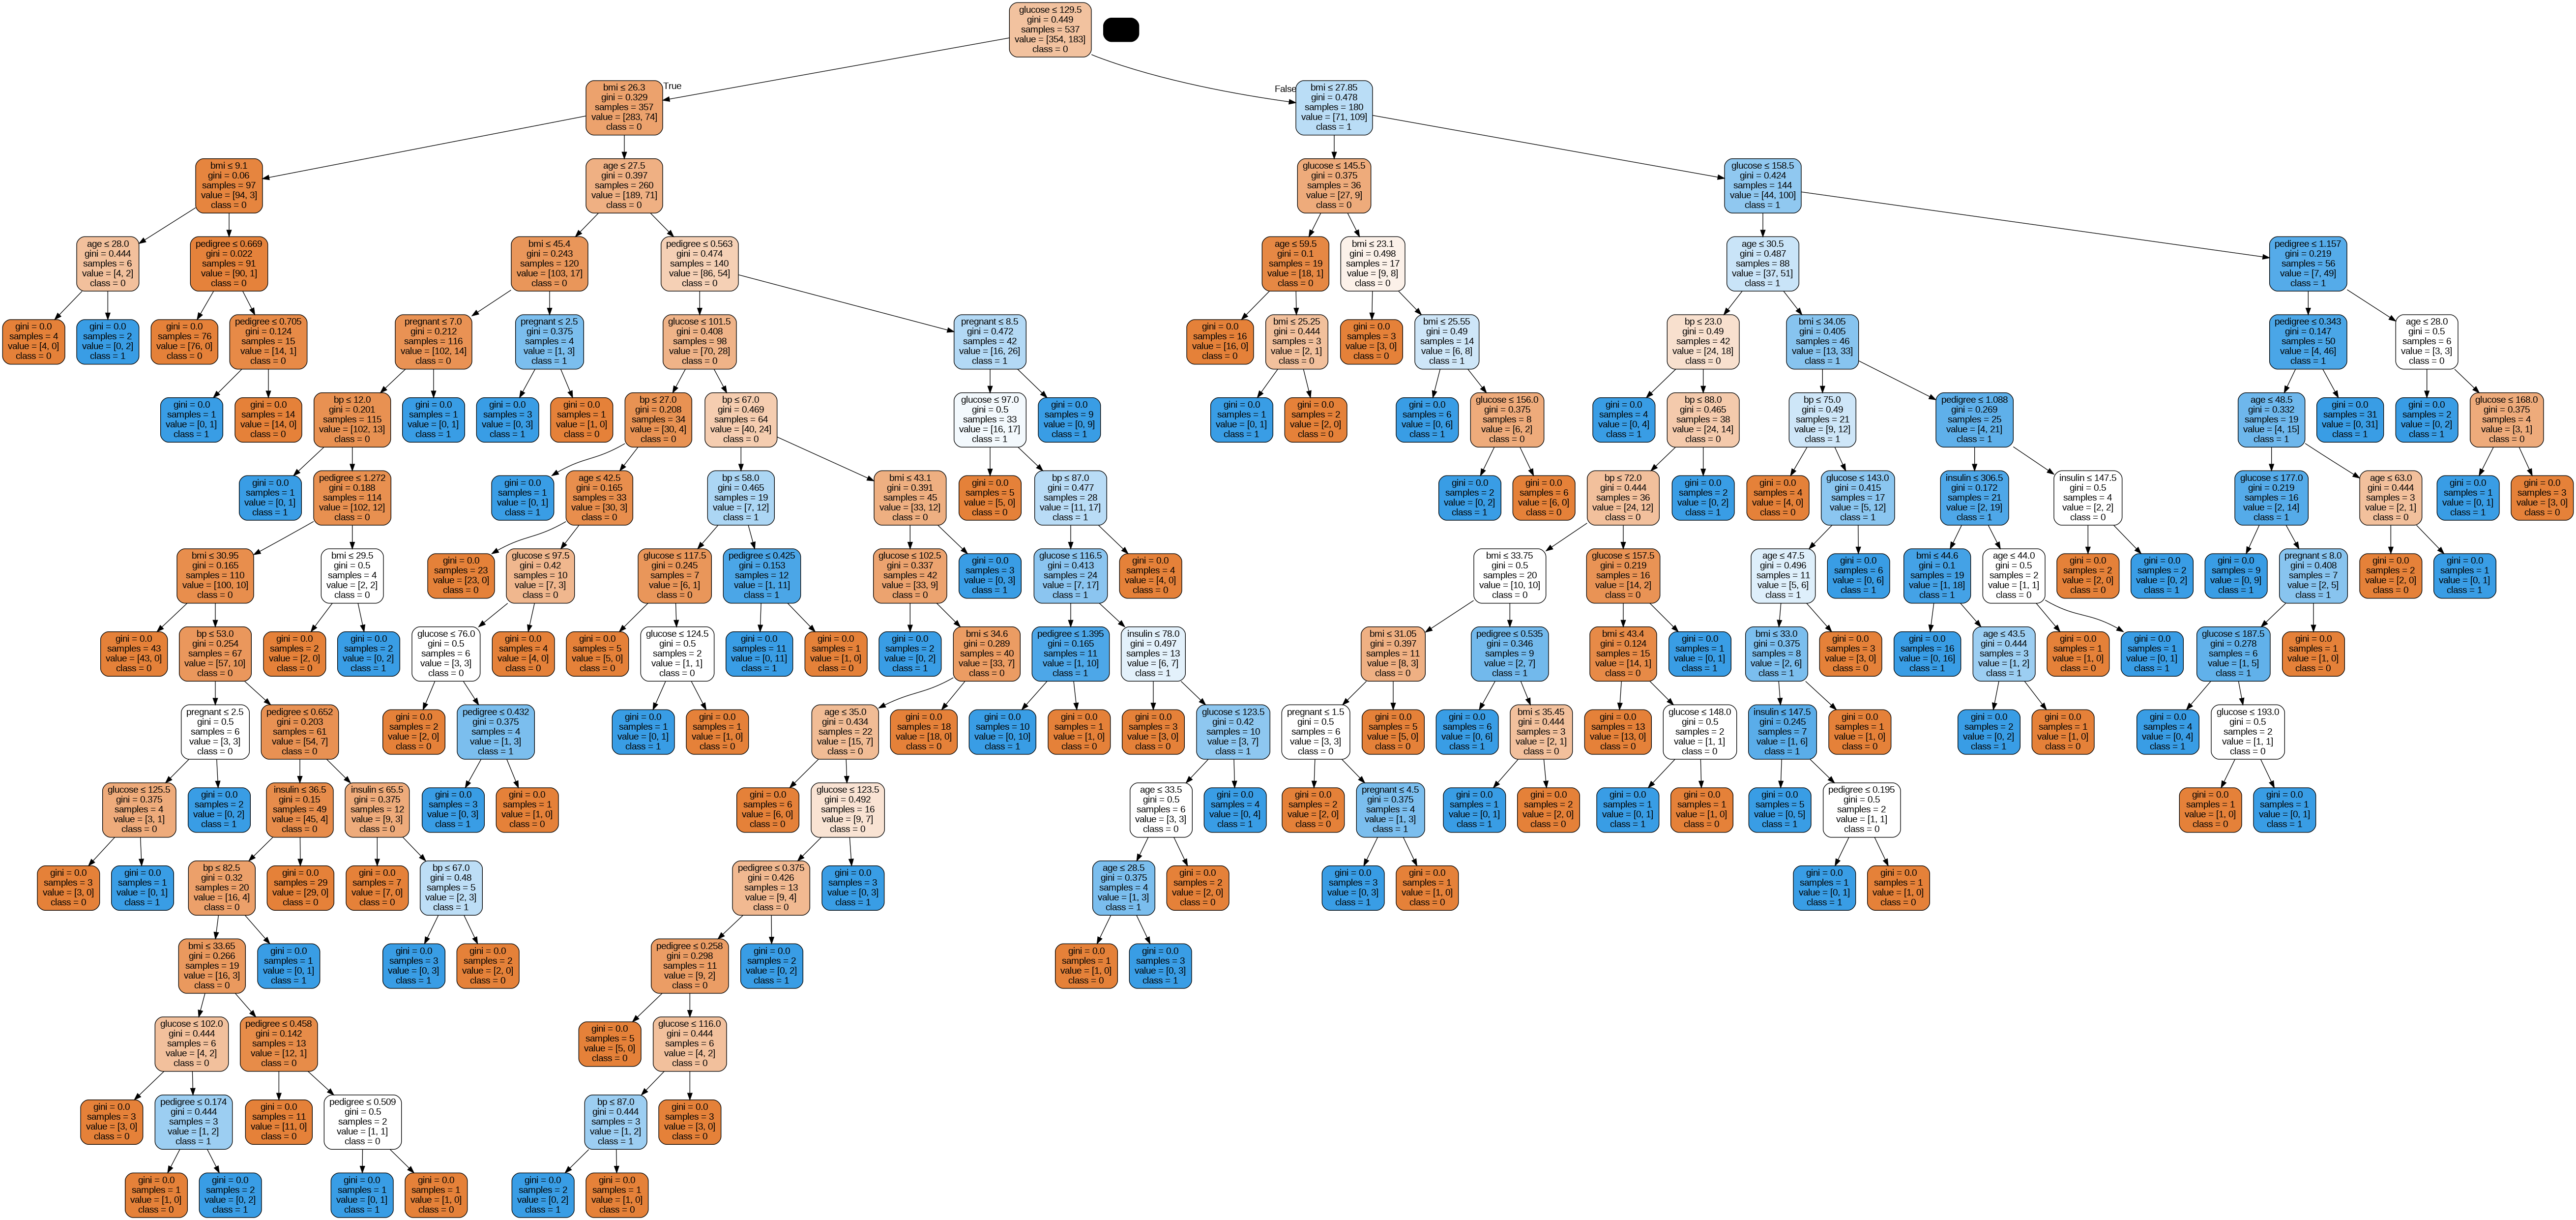

In [104]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. Gini, referred to as Gini ratio, measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.
## Optimizing Decision Tree Performance

- criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [105]:
# Create Decision Tree classifer object with entropy as criterion and max_depth = 3 as parameters
### ___ Enter your code here ___ ###
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
####################################

# Train Decision Tree Classifer
### ___ Enter your code here ___ ###
clf = clf.fit(X_train,y_train)
####################################

#Predict the response for test dataset
### ___ Enter your code here ___ ###
y_pred = clf.predict(X_test)
####################################

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


Well, the classification rate increased, which is better accuracy than the previous model.

## Visualizing Decision Trees

Let's make our decision tree a little easier to understand using the following code:

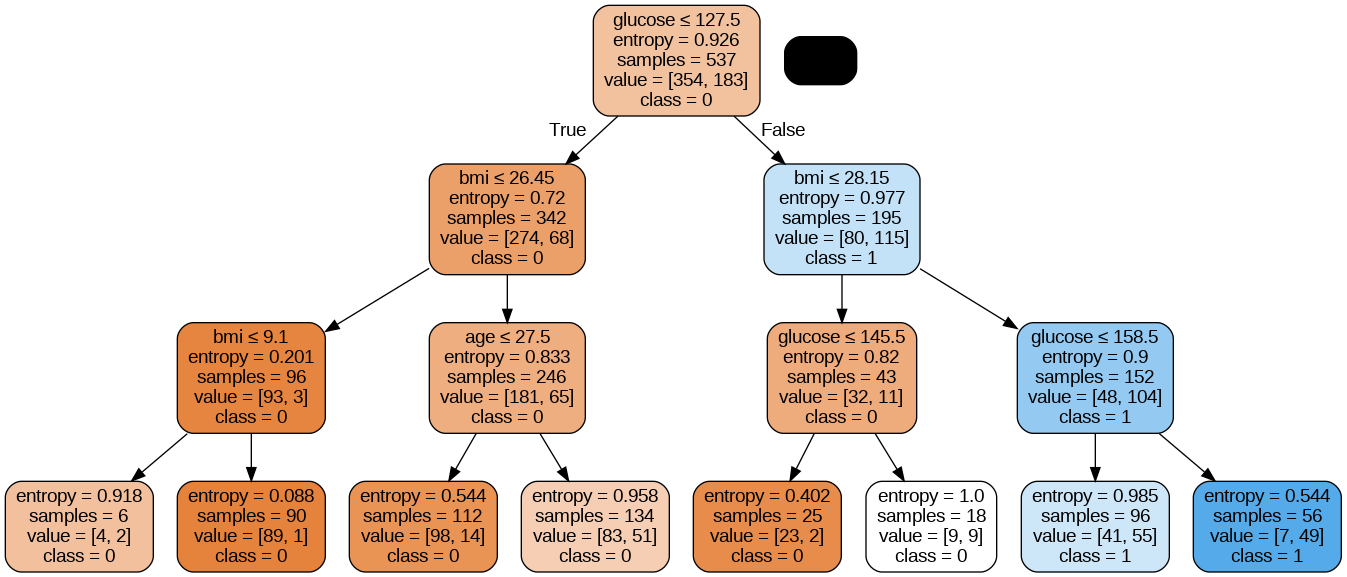

In [106]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Here, we've completed the following steps:

- Imported the required libraries.
- Created a `StringIO` object called `dot_data` to hold the text representation of the decision tree.
- Exported the decision tree to the `dot` format using the `export_graphviz` function and write the output to the `dot_data` buffer.
- Created a `pydotplus` graph object from the `dot` format representation of the decision tree stored in the `dot_data` buffer.
- Written the generated graph to a PNG file named "diabetes.png".
- Displayed the generated PNG image of the decision tree using the `Image` object from the `IPython.display module`.

<div align="center">
    <div id="Spectral Clustering">
        <font face="B Nazanin" size="15">
            <font color="#FF7500" size="15">
                سیاست تحویل مینی‌پروژه
            </font>
            <br>
            <hr>
        </font>
    </div>
</div>
<div style="text-align:right;">
    <div id="sec_1" style="direction:rtl;">
        <font face="B Nazanin" size="5">
            <hr>
            <ol>
                <li>فرمت نام گذاري تكليف ارسالي بايد به صورت زير باشد:  PRJX_LastName_StudentIDكه Xشماره تكليف LastName
نام خانوادگي شما و  StudentIDشماره دانشجويي شما است. شما در نهایت باید یک فایل فشرده تحویل بدهید.</li>
                <li>انجام اين تكليف به صورت تك نفره است. در صورت مشاهده تقلب، نمرات هم مبدا كپي و هم مقصد آن صفر لحاظ مي شود</li>
                <li>تنها در محل‌های مشخص شده با عبارت ### ___ Enter your code here ___ ### یا # COMPLETE THE CODE BELOW یا امثالهم کد خود را بنویسید و سایر قسمت‌ها را دست نخورده باقی بگذارید.</li>
                <li>جهت نوشتن کد پاسخ، به کامنت‌ها و توضیحات هر بخش توجه کامل داشته باشید.</li>
                <li>در صورت وجود هر گونه ابهام و يا سوال مي توانيد سوالات خود را با آی‌دی تلگرام @alireza_abrehforoush در میان بگذارید.</li>
                <li>ضمنا سوالات خود را به روزهای منتهی به موعد تحویل موکول نفرمایید تا به موقع و با دقت بررسی شوند.</li>
            </ol>
        </font>
    </div>
</div>